A notebook to try out the method on chunks from each patient.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import h5py
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy.io import loadmat
from pathlib import Path
from IPython.display import display, Markdown

In [30]:
import lfpreg, batchreg

In [4]:
lfpdata = Path("~/neuropixel/data/LFP_registration_shared/").expanduser()

In [5]:
def showrasters(raw, lfp, csd):
    fig, (aa, ab, ac) = plt.subplots(3, 1, figsize=(10, 8), sharex=True)
    aa.imshow(raw, aspect=0.25 * raw.shape[1] / raw.shape[0])
    ab.imshow(lfp, aspect=0.25 * lfp.shape[1] / lfp.shape[0])    
    ac.imshow(csd, aspect=0.25 * csd.shape[1] / csd.shape[0])
    aa.set_ylabel("raw lfp")
    ab.set_ylabel("lfp raster")
    ac.set_ylabel("csd raster")
    ac.set_xlabel("time")

In [6]:
subsamp = 5
thresholds = {"pt01": 0.7, "pt02": 0.7, "pt03": 0.7, "pt04": 0.9}

In [8]:
plt.rc("figure", dpi=200)

In [51]:
for f in sorted(lfpdata.glob("pt04*")):
    lfpf = list(f.glob("*LFP.mat"))[0]
    chanmapf = list(f.glob("*ChanMap.mat"))[0]
    ptstr = lfpf.name.split("_")[0]
    display(Markdown(f"## {ptstr}"))
    
    # load a chunk of data
    chanmap = loadmat(chanmapf)
    geom = np.c_[chanmap["xcoords"], chanmap["ycoords"]]
    lfpf = loadmat(lfpf)
    # raw = lfpf["LFPMatrix"]
    chans = slice(0, raw.shape[0])
    if "channels_in_brain" in lfpf:
        chans = (lfpf["channels_in_brain"].astype(int) - 1).ravel()
        chans = slice(chans[0], chans[1])
    print(chans)
#     geom = geom[chans]
#     T = raw.shape[1]
#     raw = raw[chans, T//2:T//2 + 150000].copy()
#     del lfpf
    
#     # raster and CSD
#     lfp = lfpreg.lfpraster(raw, geom)
#     csd = lfpreg.lfpraster(raw, geom, csd=True)
#     showrasters(raw, lfp, csd)
#     plt.suptitle(ptstr, y=0.925)
#     plt.show()
    
#     # register
#     # p_lfp = lfpreg.register_rigid(lfp[:, ::subsamp], mincorr=thresholds[ptstr])
#     # p_csd = lfpreg.register_rigid(csd[:, ::subsamp], mincorr=thresholds[ptstr])
#     p_lfp = batchreg.online_register_rigid(raw, geom, csd=False, mincorr=thresholds[ptstr])
#     p_csd = batchreg.online_register_rigid(raw, geom, csd=True, mincorr=thresholds[ptstr])
#     reglfp = lfpreg.rigid_registered_raster(lfp[:, ::subsamp], p_lfp)
#     regcsd = lfpreg.rigid_registered_raster(lfp[:, ::subsamp], p_csd)
    
#     # plot ps on top of the raster
#     fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
#     aa.imshow(lfp[:, ::subsamp], aspect=0.5 * lfp[:, ::subsamp].shape[1] / lfp[:, ::subsamp].shape[0])
#     ab.imshow(lfp[:, ::subsamp], aspect=0.5 * lfp[:, ::subsamp].shape[1] / lfp[:, ::subsamp].shape[0])
#     aa.plot(lfp.shape[0] / 2 + p_lfp, c="w", lw=0.5)
#     ab.plot(lfp.shape[0] / 2 + p_csd, c="w", lw=0.5)
#     aa.set_title("lfp registration")
#     ab.set_title("csd registration")
#     fig.suptitle(ptstr)
#     fig.tight_layout(pad=0.5)
#     plt.show()
    
#     # plot registered rasters
#     fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
#     aa.imshow(reglfp, aspect=0.5 * reglfp.shape[1] / reglfp.shape[0])
#     ab.imshow(regcsd, aspect=0.5 * regcsd.shape[1] / regcsd.shape[0])
#     aa.set_title("lfp registered raster")
#     ab.set_title("csd registered raster")
#     fig.suptitle(ptstr)
#     fig.tight_layout(pad=0.5)
#     plt.show()

## pt04

slice(0, 384, None)


## pt01

/Users/charlie/neuropixelsLFPregistration/python/pixelCSD.py:35: RuntimeWarning: Mean of empty slice
  mean_CSD = np.nanmean(CSD, 2)


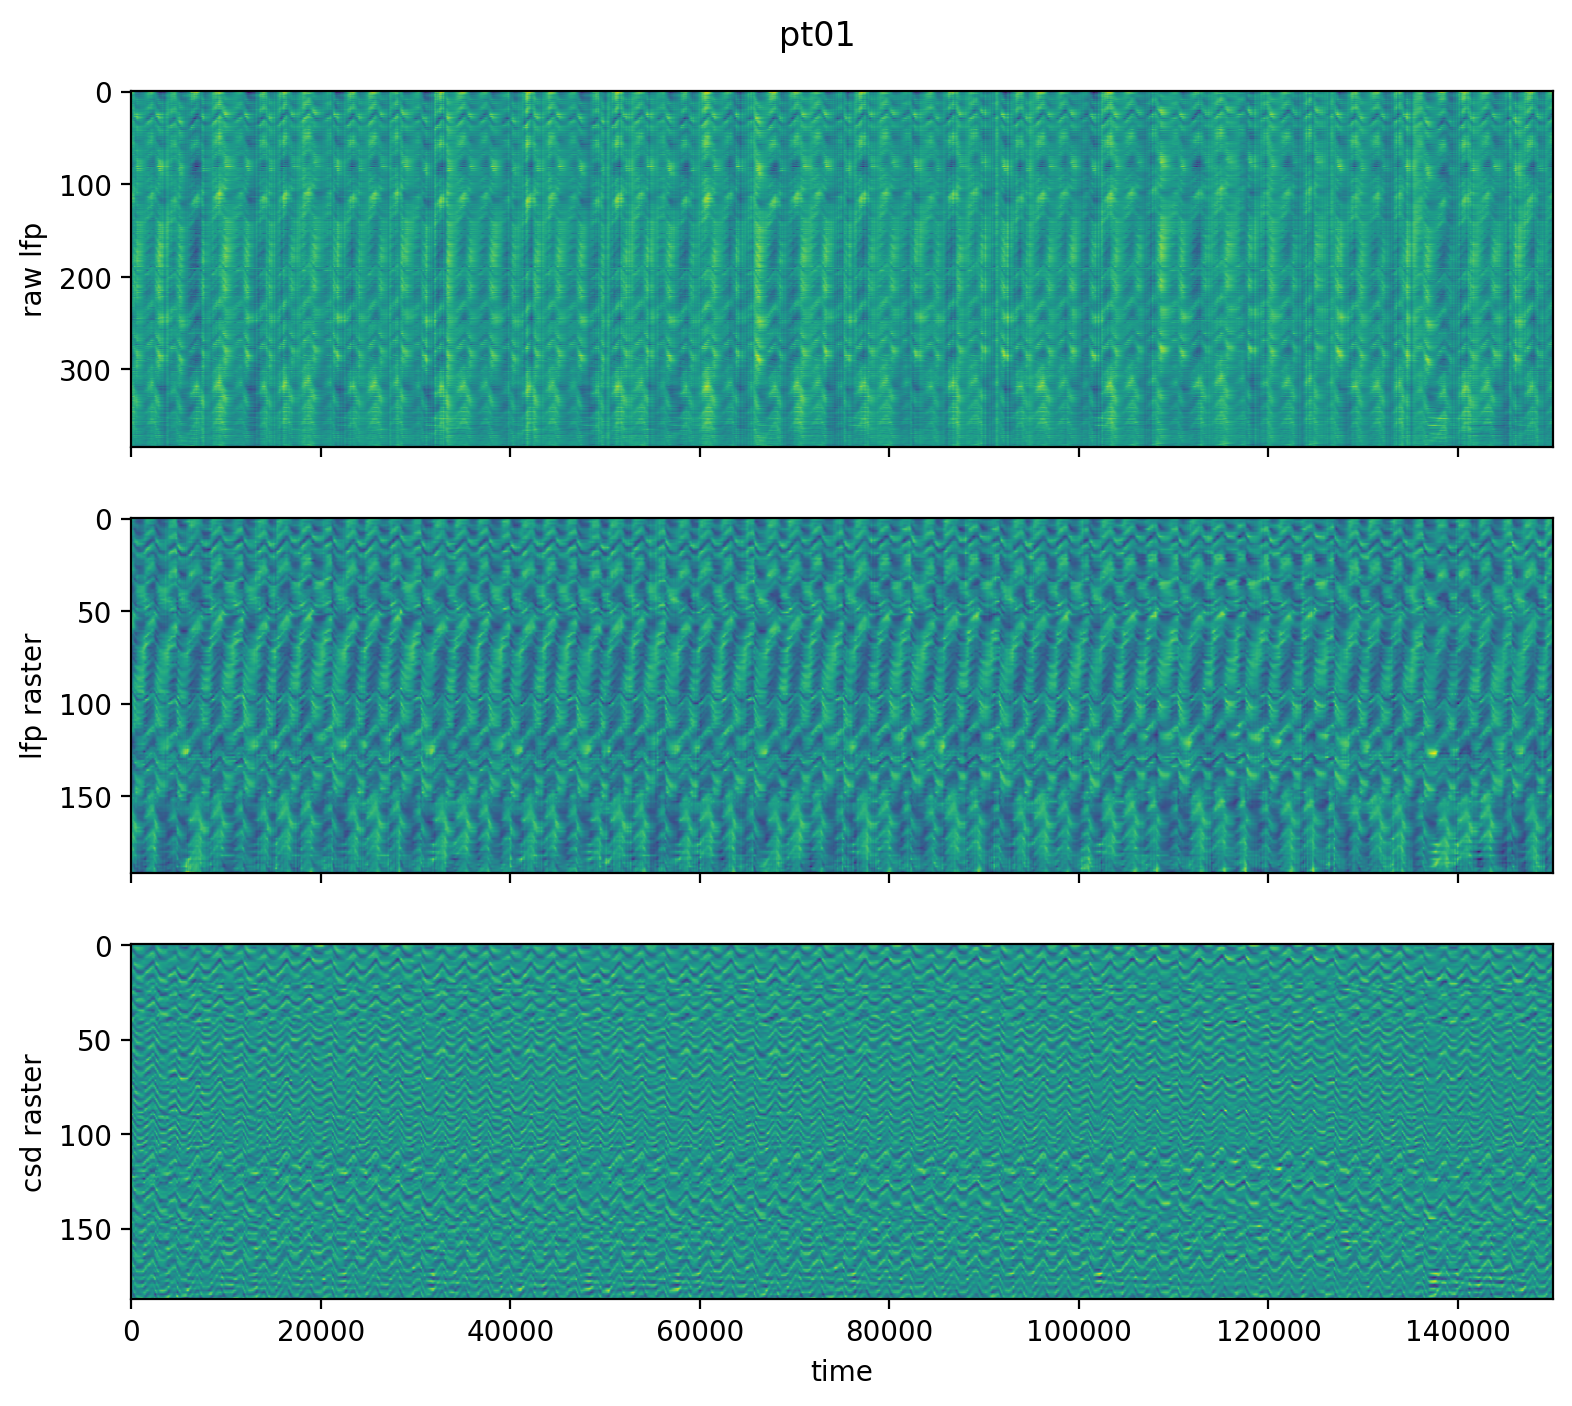

C 384 T 150000 T_ds 30000


batches:   0%|          | 0/5 [00:00<?, ?it/s]

Build matrices... took 2.0702879428863525 s
Kronecker start
lsqr problem shape (48716867, 30000) (48716867,)
 
LSMR            Least-squares solution of  Ax = b

The matrix A has 48716867 rows and 30000 columns
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =    30000

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.816e+04  1.264e+06   1.0e+00  3.8e-03
     1 -5.39540e-01  7.560e+03  3.614e+05   4.2e-01  6.3e-01  7.6e+01  1.0e+00
     2 -7.34997e-01  4.720e+03  1.534e+05   2.6e-01  3.2e-01  1.0e+02  1.3e+00
     3 -8.83558e-01  3.622e+03  8.242e+04   2.0e-01  1.9e-01  1.2e+02  1.5e+00
     4 -8.91841e-01  3.086e+03  4.996e+04   1.7e-01  1.2e-01  1.4e+02  1.8e+00
     5 -8.87261e-01  2.811e+03  3.397e+04   1.5e-01  8.1e-02  1.5e+02  2.0e+00
     6 -8.94435e-01  2.641e+03  2.428e+04   1.5e-01  5.7e-02  1.6e+02  2.1e+00
     7 -9.16967e-01  2.532e+03  1.838e+04   1

batches:   0%|          | 0/5 [00:00<?, ?it/s]

Build matrices... took 0.8361868858337402 s
Kronecker start
lsqr problem shape (20068136, 30000) (20068136,)
 
LSMR            Least-squares solution of  Ax = b

The matrix A has 20068136 rows and 30000 columns
damp = 0.00000000000000e+00

atol = 1.00e-06                 conlim = 1.00e+08

btol = 1.00e-06             maxiter =    30000

 
   itn      x(1)       norm r    norm Ar  compatible   LS      norm A   cond A
     0  0.00000e+00  1.103e+04  5.622e+05   1.0e+00  4.6e-03
     1  5.11283e-02  5.100e+03  1.785e+05   4.6e-01  6.1e-01  5.7e+01  1.0e+00
     2  7.33343e-02  3.366e+03  8.558e+04   3.1e-01  3.3e-01  7.8e+01  1.3e+00
     3  2.92610e-02  2.604e+03  5.135e+04   2.4e-01  2.1e-01  9.4e+01  1.5e+00
     4 -8.02290e-02  2.119e+03  3.419e+04   1.9e-01  1.5e-01  1.1e+02  1.7e+00
     5 -2.39544e-01  1.792e+03  2.417e+04   1.6e-01  1.1e-01  1.2e+02  1.9e+00
     6 -4.33623e-01  1.557e+03  1.772e+04   1.4e-01  8.7e-02  1.3e+02  2.1e+00
     7 -6.27907e-01  1.392e+03  1.339e+04   1

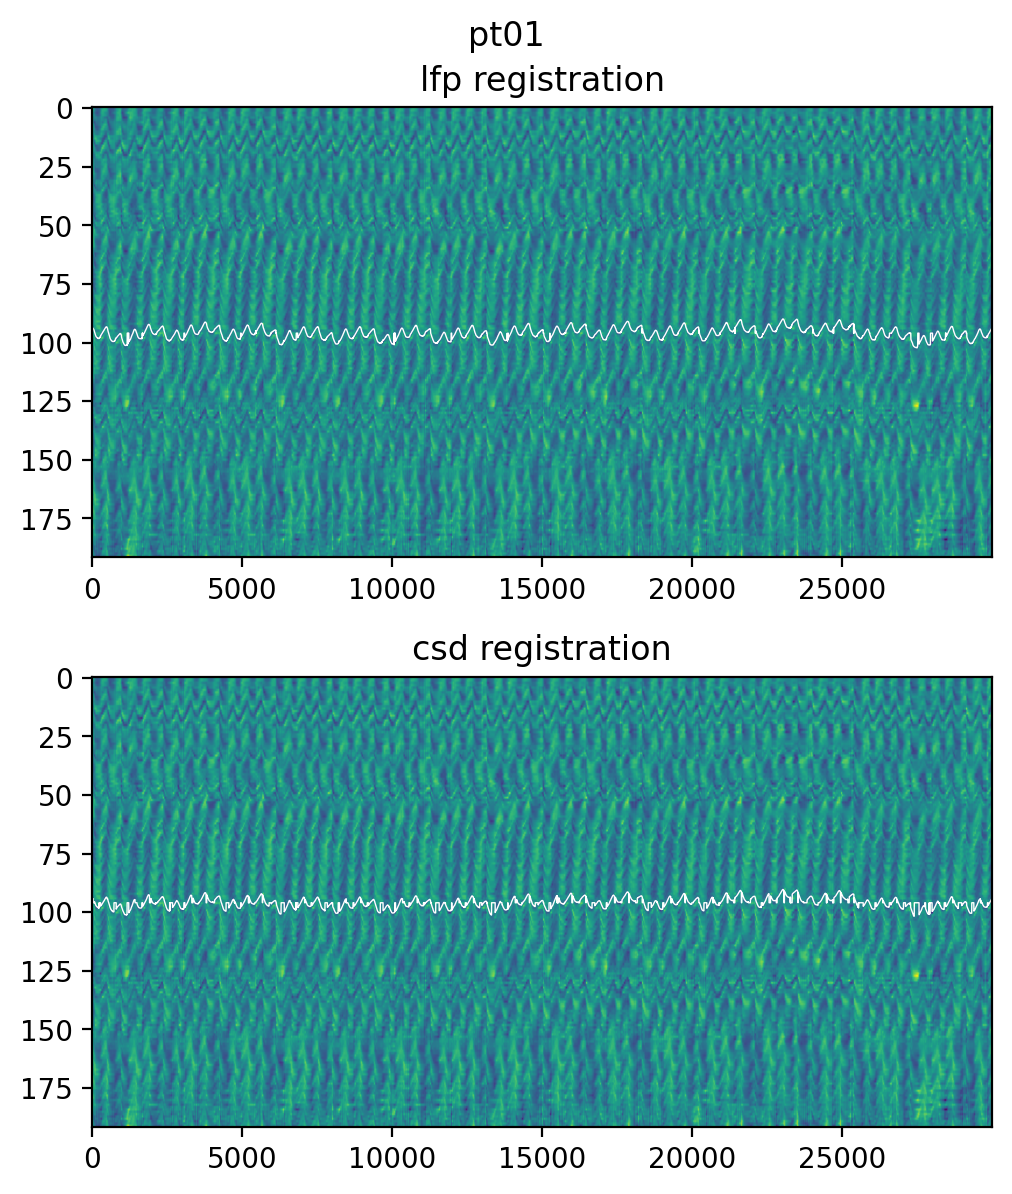

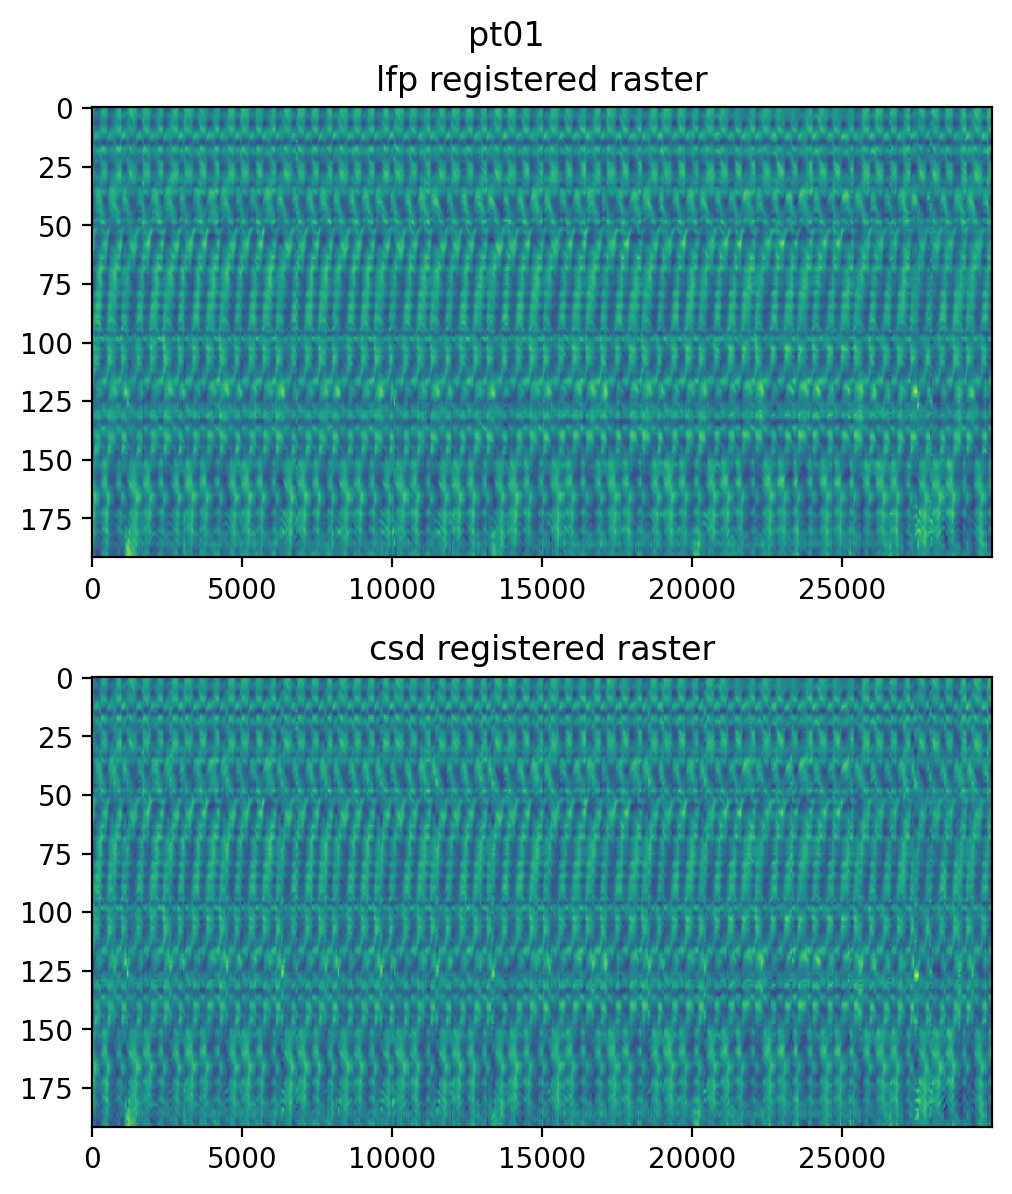

In [49]:
for f in sorted(lfpdata.glob("pt01*")):
    lfpf = list(f.glob("*LFP.mat"))[0]
    chanmapf = list(f.glob("*ChanMap.mat"))[0]
    ptstr = lfpf.name.split("_")[0]
    display(Markdown(f"## {ptstr}"))
    
    # load a chunk of data
    chanmap = loadmat(chanmapf)
    geom = np.c_[chanmap["xcoords"], chanmap["ycoords"]]
    lfpf = loadmat(lfpf)
    raw = lfpf["LFPMatrix"]
    chans = slice(0, raw.shape[0])
    if "channels_in_brain" in lfpf:
        chans = (lfpf["channels_in_brain"].astype(int) - 1).ravel()
        chans = slice(chans[0], chans[1])
    geom = geom[chans]
    T = raw.shape[1]
    raw = raw[chans, T//2:T//2 + 150000].copy()
    del lfpf
    
    # raster and CSD
    lfp = lfpreg.lfpraster(raw, geom)
    csd = lfpreg.lfpraster(raw, geom, csd=True)
    showrasters(raw, lfp, csd)
    plt.suptitle(ptstr, y=0.925)
    plt.show()
    
    # register
    # p_lfp = lfpreg.register_rigid(lfp[:, ::subsamp], mincorr=thresholds[ptstr])
    # p_csd = lfpreg.register_rigid(csd[:, ::subsamp], mincorr=thresholds[ptstr])
    p_lfp, *_ = batchreg.batch_register_rigid(raw, geom, csd=False, mincorr=thresholds[ptstr])
    p_csd, *_ = batchreg.batch_register_rigid(raw, geom, csd=True, mincorr=thresholds[ptstr])
    reglfp = lfpreg.rigid_registered_raster(lfp[:, ::subsamp], p_lfp)
    regcsd = lfpreg.rigid_registered_raster(lfp[:, ::subsamp], p_csd)
    
    # plot ps on top of the raster
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(lfp[:, ::subsamp], aspect=0.5 * lfp[:, ::subsamp].shape[1] / lfp[:, ::subsamp].shape[0])
    ab.imshow(lfp[:, ::subsamp], aspect=0.5 * lfp[:, ::subsamp].shape[1] / lfp[:, ::subsamp].shape[0])
    aa.plot(lfp.shape[0] / 2 + p_lfp, c="w", lw=0.5)
    ab.plot(lfp.shape[0] / 2 + p_csd, c="w", lw=0.5)
    aa.set_title("lfp registration")
    ab.set_title("csd registration")
    fig.suptitle(ptstr)
    fig.tight_layout(pad=0.5)
    plt.show()
    
    # plot registered rasters
    fig, (aa, ab) = plt.subplots(2, 1, figsize=(5, 6))
    aa.imshow(reglfp, aspect=0.5 * reglfp.shape[1] / reglfp.shape[0])
    ab.imshow(regcsd, aspect=0.5 * regcsd.shape[1] / regcsd.shape[0])
    aa.set_title("lfp registered raster")
    ab.set_title("csd registered raster")
    fig.suptitle(ptstr)
    fig.tight_layout(pad=0.5)
    plt.show()

In [11]:
csd.shape

(188, 50000)

In [12]:
c0 = csd[:, :1000]
c1 = csd[:, 1000:2000]
cc = csd[:, :2000]

In [22]:
DD, CC = lfpreg.calc_corr_decent(cc)

  0%|          | 0/63 [00:00<?, ?it/s]

In [23]:
D0, C0 = lfpreg.calc_corr_decent(c0)
(C0 == CC[:1000, :1000]).all()

  0%|          | 0/32 [00:00<?, ?it/s]

True

In [37]:
(D0 == DD[:1000, :1000]).all()

True

In [32]:
D1, C1 = lfpreg.calc_corr_decent(c1)
(C1 == CC[1000:2000, 1000:2000]).all()

  0%|          | 0/32 [00:00<?, ?it/s]

True

In [38]:
(D1 == DD[1000:2000, 1000:2000]).all()

True

In [33]:
D01, C01 = batchreg.calc_corr_decent_pair(c0, c1)
(C01 == CC[:1000, 1000:2000]).all()

True

In [39]:
(D01 == DD[:1000, 1000:2000]).all()

True

In [34]:
(CC == np.r_[np.c_[C0, C01], np.c_[C01.T, C1]]).all()

True

In [41]:
(DD == np.r_[np.c_[D0, D01], np.c_[-D01.T, D1]]).all()

True